
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

### Machine Learning Artificial Neural Network (ANN) from Scratch


#### Michael Pyrcz, Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

I built out a simple ANN workflow for demonstration of training the ANN with multiple epochs of forward pass prediction, back propogation of the error partial derivative and updating the model parameters, wwights and biases. First, here's some information on artificial neural networks (ANNs).

#### Artificial Neural Networks

Machine learning method for supervised learning for classification and regression analysis.  Here are some key aspects of support vector machines.

**Basic Design** *"...a computing system made up of a number of simple, highly interconnected processing elements, which process information by their dynamic state response to external inputs."* Caudill (1989). 

**Nature-inspire Computing** based on the neuronal structure in the brain, including many interconnected simple, processing units, known as nodes that are capable of complicated emergent pattern detection due to a large number of nodes and interconnectivity.

**Training and Testing** just like and other predictive model (e.g. linear regression, decision trees and support vector machines) we perform training to fit parameters and testing to tune hyperparameters.  Here we observe the error with training and testing datasets, but do not demonstrate tuning of the hyperparameters.  

**Parameters** are the weights applied to each connection and a bias term applied to each node.  For a single node in an artificial neural network, this includes the slope terms, $\beta_i$, and the bias term, $\beta_{0}$.

\begin{equation}
Y = \sum_{i=1}^m \beta_i X + \beta_0
\end{equation}

it can be seen that the number of parameters increases rapidly as we increase the number of nodes and the connectivity between the nodes.

**Layers** the typical artificial neural net is structured with an **input layer**, with one node for each $m$ predictor feature, $X_1,\ldots,X_m$. There is an **ouput layer**, with one node for each $r$ response feature, $Y_1,\ldots,Y_r$.  There may be one or more layers of nodes between the input and output layers, known as **hidden layer(s)**.  

**Connections** are the linkages between the nodes in adjacent layers.  For example, in a fully connected artificial neural network, all the input nodes are connected to all of the nodes in the first layer, then all of the nodes in the first layer are connected to the next layer and so forth. Each connection includes a weight parameter as indicated above.

**Nodes** receive the weighted signal from the connected previous layer nodes, sum and then apply this result to the **activation** function in the node. Some example activation functions include:

* **Binary** the node fires or not.  This is represented by a Heaviside step function.

* **Identify** the input is passed to the output $f(x) = x$

* **Linear** the node passes a signal that increases linearly with the weighted input.

* **Logistic** also known as sigmoid or soft step $f(x) = \frac{1}{1+e^{-x}}$

the node output is the nonlinear activiation function applied to the linearly weighted inputs. This is fed to all nodes in the next layer.

**Training Cycles** - the presentation of a batch of data, forward application of the current prediction model to make estimates, calculation of error and then backpropagation of error to correct the artificial neural network parameters to reduce the error over all of the batches.

**Batch** is the set of training data for each training cycle of forward prediction and back propagation of error, drawn to train for each iteration. There is a trade-off, a larger batch results in more computational time per iteration, but a more accurate estimate of the error to adjust the weights.  Smaller batches result in a nosier estimate of the error, but faster epochs, this results in faster learning and even possibly more robust models.

**Epochs** - is a set of training cycles, batches covering all available training data.  

**Local Minimums** - if one calculated the error hypersurface over the range of model parameters it would be hyparabolic, there is a global minimium error solution.  But this error hyper surface is rough and it is possible to be stuck in a local minimum. **Learning Rate** and **Mommentum** coefficients are introduced to avoid getting stuck in local minimums.

* **Mommentum** is a hyperparameter to control the use of information from the weight update over the last epoch for consideration in the current epoch.  This can be accomplished with an update vector, $v_i$, a mommentum parameter, $\alpha$, to calculate the current weight update, $v_{i+1}$ given the new update $\theta_{i+1}$.

\begin{equation}
v_{i+1} = \alpha v_i + \theta_{i+1}
\end{equation}

* **Learning Rate** is a hyperparameter that controls the adjustment of the weights in response to the gradient indicated by backpropagation of error 

##### Applications to subsurface modeling

We demonstrate the estimation of normal score transformed porosity from depth.  This would be useful for building a vertical trend model. 

* modeling the complicated relationship between porosity and depth.

#### Limitations of Neural Network Estimation

Since we demonstrate the use of an artificial neural network to estimate porosity from sparsely sampled data over depth, we should comment on limitations of our artificial neural networks for this estimation problem:

* does not honor the well data

* does not honor the histogram of the data

* does not honor spatial correlation 

* does not honor the multivariate relationship

* generally low interpretability models

* requires a large number of data for effective training

* high model complexity with high model variance

#### Import Required Packages

We will also need some standard packages. These should have been installed with Anaconda 3.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, AutoLocator) # control of axes ticks
plt.rc('axes', axisbelow=True)                            # set axes and grids in the background for all plots
from ipywidgets import interactive                        # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
import math
seed = 13

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

I just added a convenience function for adding major and minor gridlines.

In [2]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

def calculate_angle_rads(x1, y1, x2, y2):
    dx = x2 - x1     # Calculate the differences
    dy = y2 - y1
    angle_rads = math.atan2(dy, dx)    # Calculate the angle in radians
    #angle_degrees = math.degrees(angle_radians)    # Convert the angle to degrees
    return angle_rads
    
def offset(pto, distance, angle_deg): # modified from ChatGPT 4.o generated
    angle_rads = math.radians(angle_deg) # Convert angle from degrees to radians
    x_new = pto[0] + distance * math.cos(angle_rads) # Calculate the new coordinates
    y_new = pto[1] + distance * math.sin(angle_rads)
    return np.array((x_new, y_new))

def offsetx(xo, distance, angle_deg): # modified from ChatGPT 4.o generated
    angle_rads = math.radians(angle_deg) # Convert angle from degrees to radians
    x_new = xo + distance * math.cos(angle_rads) # Calculate the new coordinates
    return np.array((xo, x_new))

def offset_arrx(xo, distance, angle_deg,size): # modified from ChatGPT 4.o generated
    angle_rads = math.radians(angle_deg) # Convert angle from degrees to radians
    x_new = xo + distance * math.cos(angle_rads) # Calculate the new coordinates
    x_arr = x_new + size * math.cos(angle_rads+2.48) # Calculate the new coordinates
    return np.array((x_new, x_arr))

def offsety(yo, distance, angle_deg): # modified from ChatGPT 4.o generated
    angle_rads = math.radians(angle_deg) # Convert angle from degrees to radians
    y_new = yo + distance * math.sin(angle_rads) # Calculate the new coordinates
    return np.array((yo, y_new))

def offset_arry(yo, distance, angle_deg,size): # modified from ChatGPT 4.o generated
    angle_rads = math.radians(angle_deg) # Convert angle from degrees to radians
    y_new = yo + distance * math.sin(angle_rads) # Calculate the new coordinates
    y_arr = y_new + size * math.sin(angle_rads+2.48) # Calculate the new coordinates
    return np.array((y_new, y_arr))

def lint(x1, y1, x2, y2, t):
    # Calculate the interpolated coordinates
    x = x1 + t * (x2 - x1)
    y = y1 + t * (y2 - y1)
    return np.array((x, y))

def lintx(x1, y1, x2, y2, t):
    # Calculate the interpolated coordinates
    x = x1 + t * (x2 - x1)
    return x

def linty(x1, y1, x2, y2, t):
    # Calculate the interpolated coordinates
    y = y1 + t * (y2 - y1)
    return y

def lint_intx(x1, y1, x2, y2, ts, te):
    # Calculate the interpolated coordinates
    xs = x1 + ts * (x2 - x1)
    xe = x1 + te * (x2 - x1)
    return np.array((xs,xe))

def lint_inty(x1, y1, x2, y2, ts, te):
    # Calculate the interpolated coordinates
    ys = y1 + ts * (y2 - y1)
    ye = y1 + te * (y2 - y1)
    return np.array((ys,ye))

def lint_int_arrx(x1, y1, x2, y2, ts, te, size):
    # Calculate the interpolated coordinates
    xe = x1 + te * (x2 - x1)
    line_angle_rads = calculate_angle_rads(x1, y1, x2, y2)
    x_arr = xe + size * math.cos(line_angle_rads+2.48) # Calculate the new coordinates
    return np.array((xe,x_arr))

def lint_int_arry(x1, y1, x2, y2, ts, te, size):
    # Calculate the interpolated coordinates
    ye = y1 + te * (y2 - y1)
    line_angle_rads = calculate_angle_rads(x1, y1, x2, y2)
    y_arr = ye + size * math.sin(line_angle_rads+2.48) # Calculate the new coordinates
    return np.array((ye,y_arr))

def as_si(x, ndp): # from xnx on StackOverflow https://stackoverflow.com/questions/31453422/displaying-numbers-with-x-instead-of-e-scientific-notation-in-matplotlib 
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'{m:s}\times 10^{{{e:d}}}'.format(m=m, e=int(e))

#### The Simple ANN

I wrote this code to specify a simple ANN:

- three input nodes, 2 hidden nodes and 1 output node

and to train the ANN by interatively performing the forward calculation and backpropagation. I calculate:

- the error and then propagate it to each node
- solve for the partial derivatives of the error with respect to each weight and bias

all weights, biases and partial derivatives for all epoch are recorded in vectors for plotting

In [3]:
x1 = 0.5; x2 = 0.2; x3 = 0.7; y = 0.3 # training data
lr = 0.2 # learning rate

np.random.seed(seed=seed)

nepoch = 1000

y4 = np.zeros(nepoch); y5 = np.zeros(nepoch); y6 = np.zeros(nepoch)

w14 = np.zeros(nepoch); w24 = np.zeros(nepoch); w34 = np.zeros(nepoch)
w15 = np.zeros(nepoch); w25 = np.zeros(nepoch); w35 = np.zeros(nepoch)
w46 = np.zeros(nepoch); w56 = np.zeros(nepoch)

dw14 = np.zeros(nepoch); dw24 = np.zeros(nepoch); dw34 = np.zeros(nepoch)
dw15 = np.zeros(nepoch); dw25 = np.zeros(nepoch); dw35 = np.zeros(nepoch)
dw46 = np.zeros(nepoch); dw56 = np.zeros(nepoch)

db4 = np.zeros(nepoch); db5 = np.zeros(nepoch); db6 = np.zeros(nepoch)

b4 = np.zeros(nepoch); b5 = np.zeros(nepoch); b6 = np.zeros(nepoch)
y4 = np.zeros(nepoch); y5 = np.zeros(nepoch); y6 = np.zeros(nepoch)
d4 = np.zeros(nepoch); d5 = np.zeros(nepoch); d6 = np.zeros(nepoch)

# initialize the weights - Xavier Weight Initialization 
lower, upper = -(1.0 / np.sqrt(3.0)), (1.0 / np.sqrt(3.0)) # lower and upper bound for the weights, uses inputs to node
#lower, upper = -(sqrt(6.0) / sqrt(3.0 + 2.0)), (sqrt(6.0) / sqrt(3.0 + 2.0)) # Normalized Xavier weights, integrates ouputs also
w14[0] = lower + np.random.random() * (upper - lower); 
w24[0] = lower + np.random.random() * (upper - lower); 
w34[0] = lower + np.random.random() * (upper - lower);
w15[0] = lower + np.random.random() * (upper - lower); 
w25[0] = lower + np.random.random() * (upper - lower); 
w35[0] = lower + np.random.random() * (upper - lower);

lower, upper = -(1.0 / np.sqrt(2.0)), (1.0 / np.sqrt(2.0))
#lower, upper = -(sqrt(6.0) / sqrt(2.0 + 1.0)), (sqrt(6.0) / sqrt(2.0 + 1.0)) # Normalized Xavier weights, integrates ouputs also

w46[0] = lower + np.random.random() * (upper - lower); 
w56[0] = lower + np.random.random() * (upper - lower);     

#b4[0] = np.random.random(); b5[0] = np.random.random(); b6[0] = np.random.random()
b4[0] = (np.random.random()-0.5)*0.5; b5[0] = (np.random.random()-0.5)*0.5; b6[0] = (np.random.random()-0.5)*0.5; # small random value    


for i in range(0,nepoch):

# forward pass of model
    y4[i] = w14[i]*x1 + w24[i]*x2 + w34[i]*x3 + b4[i]; 
    y4[i] = 1.0/(1 + math.exp(-1*y4[i]))
    
    y5[i] = w15[i]*x1 + w25[i]*x2 + w35[i]*x3 + b5[i]
    y5[i] = 1.0/(1 + math.exp(-1*y5[i]))
    
    y6[i] = w46[i]*y4[i] + w56[i]*y5[i] + b6[i]
#    y6[i] = 1.0/(1 + math.exp(-1*y6[i])) # sgimoid / logistic activation at o6 

# back propagate the error through the nodes
#    d6[i] = y6[i]*(1-y6[i])*(y-y6[i]) # sgimoid / logistic activation at o6 
    d6[i] = (y-y6[i]) # identity activation o at o6
    d5[i] = y5[i]*(1-y5[i])*w56[i]*d6[i]; d4[i] = y4[i]*(1-y4[i])*w46[i]*d6[i]

# calculate the change in weights
    if i < nepoch - 1:
        dw14[i] = lr*d4[i]*x1; dw24[i] = lr*d4[i]*x2; dw34[i] = lr*d4[i]*x3
        dw15[i] = lr*d5[i]*x1; dw25[i] = lr*d5[i]*x2; dw35[i] = lr*d5[i]*x3
        dw46[i] = lr*d6[i]*y4[i]; dw56[i] = lr*d6[i]*y5[i] 
        
        db4[i] = lr*d4[i]; db5[i] = lr*d5[i]; db6[i] = lr*d6[i];

        w14[i+1] = w14[i] + dw14[i]; w24[i+1] = w24[i] + dw24[i]; w34[i+1] = w34[i] + dw34[i] 
        w15[i+1] = w15[i] + dw15[i]; w25[i+1] = w25[i] + dw25[i]; w35[i+1] = w35[i] + dw35[i] 
        w46[i+1] = w46[i] + dw46[i]; w56[i+1] = w56[i] + dw56[i]

        b4[i+1] = b4[i] + db4[i]; b5[i+1] = b5[i] + db5[i]; b6[i+1] = b6[i] + db6[i] 

#### Now Visualize the Network for a Specific Epoch

I wrote a custome network visualization below.

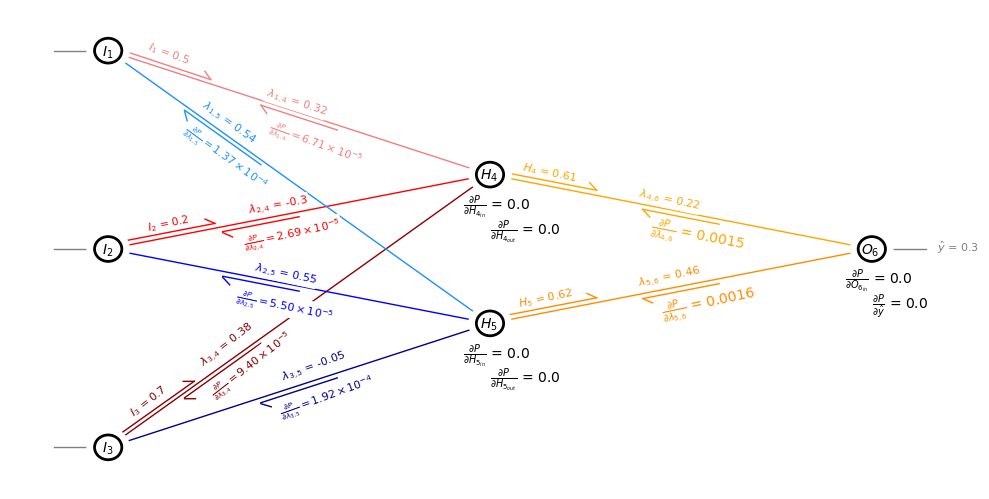

In [6]:
iepoch = 10

dx = -0.19; dy = -0.09; edge = 1.0

o6x = 17; o6y =5; h5x = 10; h5y = 3.5; h4x = 10; h4y = 6.5
i1x = 3; i1y = 9.0; i2x = 3; i2y = 5; i3x = 3; i3y = 1.0; buffer = 0.5

plt.subplot(111)
plt.gca().set_axis_off()

circle_i1 = plt.Circle((i1x,i1y), 0.25, fill=False, edgecolor = 'black',lw=2,zorder=100); plt.annotate(r' $I_1$',(i1x+dx,i1y+dy),zorder=100); 
circle_i1b = plt.Circle((i1x,i1y), 0.40, fill=True, facecolor = 'white',edgecolor = None,lw=1,zorder=10);
plt.gca().add_patch(circle_i1); plt.gca().add_patch(circle_i1b)

circle_i2 = plt.Circle((i2x,i2y), 0.25, fill=False, edgecolor = 'black',lw=2,zorder=100); plt.annotate(r' $I_2$',(i2x+dx,i2y+dy),zorder=100); 
circle_i2b = plt.Circle((i2x,i2y), 0.40, fill=True, facecolor = 'white',edgecolor = None,lw=1,zorder=10);
plt.gca().add_patch(circle_i2); plt.gca().add_patch(circle_i2b)

circle_i3 = plt.Circle((i3x,i3y), 0.25, fill=False, edgecolor = 'black',lw=2,zorder=100); plt.annotate(r' $I_3$',(i3x+dx,i3y+dy),zorder=100); 
circle_i3b = plt.Circle((i3x,i3y), 0.40, fill=True, facecolor = 'white',edgecolor = None,lw=1,zorder=10);
plt.gca().add_patch(circle_i3); plt.gca().add_patch(circle_i3b)

circle_h4 = plt.Circle((h4x,h4y), 0.25, fill=False, edgecolor = 'black',lw=2,zorder=100); plt.annotate(r'$H_4$',(h4x+dx,h4y+dy),zorder=100); 
circle_h4b = plt.Circle((h4x,h4y), 0.40, fill=True, facecolor = 'white',edgecolor = None,lw=1,zorder=10);
plt.gca().add_patch(circle_h4); plt.gca().add_patch(circle_h4b)

circle_h5 = plt.Circle((h5x,h5y), 0.25, fill=False, edgecolor = 'black',lw=2,zorder=100); plt.annotate(r'$H_5$',(h5x+dx,h5y+dy),zorder=100); 
circle_h5b = plt.Circle((h5x,h5y), 0.40, fill=True, facecolor = 'white',edgecolor = None,lw=1,zorder=10);
plt.gca().add_patch(circle_h5); plt.gca().add_patch(circle_h5b)

circle_o6 = plt.Circle((o6x,o6y), 0.25, fill=False, edgecolor = 'black',lw=2,zorder=100); plt.annotate(r'$O_6$',(o6x+dx,o6y+dy),zorder=100); 
circle_o6b = plt.Circle((o6x,o6y), 0.40, fill=True, facecolor = 'white',edgecolor = None,lw=1,zorder=10);
plt.gca().add_patch(circle_o6); plt.gca().add_patch(circle_o6b)

plt.plot([i1x-edge,i1x],[i1y,i1y],color='grey',lw=1.0,zorder=1)
plt.plot([i2x-edge,i2x],[i2y,i2y],color='grey',lw=1.0,zorder=1)
plt.plot([i3x-edge,i3x],[i3y,i3y],color='grey',lw=1.0,zorder=1)

plt.annotate(r'$x_1$ = ' + str(np.round(x1,2)),(i1x-buffer-1.6,i1y-0.05),size=8,zorder=200,color='grey',
             bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=0) 
plt.annotate(r'$x_2$ = ' + str(np.round(x2,2)),(i2x-buffer-1.6,i2y-0.05),size=8,zorder=200,color='grey',
             bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=0) 
plt.annotate(r'$x_3$ = ' + str(np.round(x3,2)),(i3x-buffer-1.6,i3y-0.05),size=8,zorder=200,color='grey',
             bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=0) 

plt.plot([i1x,h4x],[i1y,h4y],color='lightcoral',lw=1.0,zorder=1)
plt.plot([i2x,h4x],[i2y,h4y],color='red',lw=1.0,zorder=1)
plt.plot([i3x,h4x],[i3y,h4y],color='darkred',lw=1.0,zorder=1)

plt.plot([i1x,h5x],[i1y,h5y],color='dodgerblue',lw=1.0,zorder=1)
plt.plot([i2x,h5x],[i2y,h5y],color='blue',lw=1.0,zorder=1)
plt.plot([i3x,h5x],[i3y,h5y],color='darkblue',lw=1.0,zorder=1)

plt.plot([h4x,o6x],[h4y,o6y],color='orange',lw=1.0,zorder=1)
plt.plot([h5x,o6x],[h5y,o6y],color='darkorange',lw=1.0,zorder=1)

plt.plot([o6x+edge,o6x],[o6y,o6y],color='grey',lw=1.0,zorder=1)
plt.annotate(r'$\hat{y}$ = ' + str(np.round(y6[iepoch],2)),(o6x+buffer+0.7,o6y-0.05),size=8,zorder=200,color='grey',
             bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=0) 

plt.plot(offsetx(h4x,2,-12),offsety(h4y,2,-12)+0.1,color='orange',lw=1.0,zorder=1)
plt.plot(offset_arrx(h4x,2,-12,0.2),offset_arry(h4y,2,-12,0.2)+0.1,color='orange',lw=1.0,zorder=1)
plt.annotate(r'$H_{4}$ = ' + str(np.round(y4[iepoch],2)),(lintx(h4x,h4y,o6x,o6y,0.08),linty(h4x,h4y,o6x,o6y,0.08)-0.0),size=8,zorder=200,color='orange',
             bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=-12)

plt.plot(offsetx(h5x,2,12),offsety(h5y,2,12)+0.1,color='darkorange',lw=1.0,zorder=1)
plt.plot(offset_arrx(h5x,2,12,0.2),offset_arry(h5y,2,12,0.2)+0.1,color='darkorange',lw=1.0,zorder=1)
plt.annotate(r'$H_{5}$ = ' + str(np.round(y5[iepoch],2)),(lintx(h5x,h5y,o6x,o6y,0.07),linty(h5x,h5y,o6x,o6y,0.07)+0.25),size=8,zorder=200,color='darkorange',
             bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=12)

plt.annotate(r'$\frac{\partial P}{\partial O_{6_{in}}}$ = ' + str(np.round(d6[iepoch],2)),(o6x-0.5,o6y-0.7),size=10)
plt.annotate(r'$\frac{\partial P}{\partial H_{4_{in}}}$ = ' + str(np.round(d4[iepoch],2)),(h4x-0.5,h4y-0.7),size=10)
plt.annotate(r'$\frac{\partial P}{\partial H_{5_{in}}}$ = ' + str(np.round(d5[iepoch],2)),(h5x-0.5,h5y-0.7),size=10)

plt.annotate(r'$\frac{\partial P}{\partial \hat{y}}$ = ' + str(np.round(d6[iepoch],2)),(o6x,o6y-1.2),size=10)
plt.annotate(r'$\frac{\partial P}{\partial H_{4_{out}}}$ = ' + str(np.round(w46[iepoch]*d6[iepoch],2)),(h4x,h4y-1.2),size=10)
plt.annotate(r'$\frac{\partial P}{\partial H_{5_{out}}}$ = ' + str(np.round(w56[iepoch]*d6[iepoch],2)),(h5x,h5y-1.2),size=10)

plt.plot(lint_intx(h4x, h4y, o6x, o6y,0.4,0.6),lint_inty(h4x,h4y,o6x,o6y,0.4,0.6)-0.1,color='orange',lw=1.0,zorder=1)
plt.plot(lint_int_arrx(o6x,o6y,h4x,h4y,0.4,0.6,0.2),lint_int_arry(o6x,o6y,h4x,h4y,0.4,0.6,0.2)-0.1,color='orange',lw=1.0,zorder=1)
plt.annotate(r'$\frac{\partial P}{\partial \lambda_{4,6}}$ = ' + str(np.round(dw46[iepoch]/lr,4)),(lintx(h4x,h4y,o6x,o6y,0.5)-0.6,linty(h4x,h4y,o6x,o6y,0.5)-0.72),size=10,zorder=200,color='orange',
              bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=-11)

plt.plot(lint_intx(h5x, h5y, o6x, o6y,0.4,0.6),lint_inty(h5x,h5y,o6x,o6y,0.4,0.6)-0.1,color='darkorange',lw=1.0,zorder=1)
plt.plot(lint_int_arrx(o6x,o6y,h5x,h5y,0.4,0.6,0.2),lint_int_arry(o6x,o6y,h5x,h5y,0.4,0.6,0.2)-0.1,color='darkorange',lw=1.0,zorder=1)
plt.annotate(r'$\frac{\partial P}{\partial \lambda_{5,6}}$ = ' + str(np.round(dw56[iepoch]/lr,4)),(lintx(h5x,h5y,o6x,o6y,0.5)-0.4,linty(h5x,h5y,o6x,o6y,0.5)-0.6),size=10,zorder=200,color='darkorange',
              bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=12)

plt.plot(offsetx(i1x,2,-20),offsety(i1y,2,-20)+0.1,color='lightcoral',lw=1.0,zorder=1)
plt.plot(offset_arrx(i1x,2,-20,0.2),offset_arry(i1y,2,-20,0.2)+0.1,color='lightcoral',lw=1.0,zorder=1)
plt.annotate(r'$I_{1}$ = ' + str(np.round(x1,2)),(lintx(i1x,i1y,h4x,h4y,0.1),linty(i1x,i1y,h4x,h4y,0.1)),size=8,zorder=200,color='lightcoral',
             bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=-20)

plt.plot(offsetx(i2x,2,12),offsety(i2y,2,12)+0.1,color='red',lw=1.0,zorder=1)
plt.plot(offset_arrx(i2x,2,12,0.2),offset_arry(i2y,2,12,0.2)+0.1,color='red',lw=1.0,zorder=1)
plt.annotate(r'$I_{2}$ = ' + str(np.round(x2,2)),(lintx(i2x,i2y,h4x,h4y,0.1),linty(i2x,i2y,h4x,h4y,0.1)+0.22),size=8,zorder=200,color='red',
             bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=12)

plt.plot(offsetx(i3x,2,38),offsety(i3y,2,38)+0.1,color='darkred',lw=1.0,zorder=1)
plt.plot(offset_arrx(i3x,2,38,0.2),offset_arry(i3y,2,38,0.2)+0.1,color='darkred',lw=1.0,zorder=1)
plt.annotate(r'$I_{3}$ = ' + str(np.round(x3,2)),(lintx(i3x,i3y,h4x,h4y,0.08)-0.2,linty(i3x,i3y,h4x,h4y,0.08)+0.2),size=8,zorder=200,color='darkred',
             bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=38)

plt.annotate(r'$\lambda_{1,4}$ = ' + str(np.round(w14[iepoch],2)),((i1x+h4x)*0.45,(i1y+h4y)*0.5-0.05),size=8,zorder=200,color='lightcoral',
             bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=-18) 
plt.annotate(r'$\lambda_{2,4}$ = ' + str(np.round(w24[iepoch],2)),((i2x+h4x)*0.45-0.3,(i2y+h4y)*0.5-0.03),size=8,zorder=200,color='red',
             bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=10) 
plt.annotate(r'$\lambda_{3,4}$ = ' + str(np.round(w34[iepoch],2)),((i3x+h4x)*0.45-1.2,(i3y+h4y)*0.5-1.1),size=8,zorder=200,color='darkred',
             bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=38) 

plt.annotate(r'$\lambda_{1,5}$ = ' + str(np.round(w15[iepoch],2)),((i1x+h5x)*0.55-2.5,(i1y+h5y)*0.5+0.9),size=8,zorder=200,color='dodgerblue',
    bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=-36) 
plt.annotate(r'$\lambda_{2,5}$ = ' + str(np.round(w25[iepoch],2)),((i2x+h5x)*0.55-1.5,(i2y+h5y)*0.5+0.05),size=8,zorder=200,color='blue',
             bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=-12) 
plt.annotate(r'$\lambda_{3,5}$ = ' + str(np.round(w35[iepoch],2)),((i3x+h5x)*0.55-1.0,(i3y+h5y)*0.5+0.1),size=8,zorder=200,color='darkblue',
             bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=20) 

plt.annotate(r'$\lambda_{4,6}$ = ' + str(np.round(w46[iepoch],2)),((h4x+o6x)*0.47,(h4y+o6y)*0.47+0.39),size=8,zorder=200,color='orange',
    bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=-12) 
plt.annotate(r'$\lambda_{5,6}$ = ' + str(np.round(w56[iepoch],2)),((h5x+o6x)*0.47,(h5y+o6y)*0.47+0.26),size=8,zorder=200,color='darkorange',
    bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=12) 

plt.plot(lint_intx(i1x, i1y, h4x, h4y,0.4,0.6),lint_inty(i1x,i1y,h4x,h4y,0.4,0.6)-0.1,color='lightcoral',lw=1.0,zorder=1)
plt.plot(lint_int_arrx(h4x,h4y,i1x,i1y,0.4,0.6,0.2),lint_int_arry(h4x,h4y,i1x,i1y,0.4,0.6,0.2)-0.1,color='lightcoral',lw=1.0,zorder=1)
plt.annotate(r'$\frac{\partial P}{\partial \lambda_{1,4}} =$' + r'${0:s}$'.format(as_si(dw14[iepoch]/lr,2)),(lintx(i1x,i1y,h4x,h4y,0.5)-0.6,linty(i1x,i1y,h4x,h4y,0.5)-1.0),size=8,zorder=200,color='lightcoral',
              bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=-20)

plt.plot(lint_intx(i2x, i2y, h4x, h4y,0.3,0.5),lint_inty(i2x,i2y,h4x,h4y,0.3,0.5)-0.1,color='red',lw=1.0,zorder=1)
plt.plot(lint_int_arrx(h4x,h4y,i2x,i2y,0.5,0.7,0.2),lint_int_arry(h4x,h4y,i2x,i2y,0.5,0.7,0.2)-0.12,color='red',lw=1.0,zorder=1)
plt.annotate(r'$\frac{\partial P}{\partial \lambda_{2,4}} =$' + r'${0:s}$'.format(as_si(dw24[iepoch]/lr,2)),(lintx(i2x,i2y,h4x,h4y,0.5)-1.05,linty(i2x,i2y,h4x,h4y,0.5)-0.7),size=8,zorder=200,color='red',
              bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=12)

plt.plot(lint_intx(i3x, i3y, h4x, h4y,0.2,0.4),lint_inty(i3x,i3y,h4x,h4y,0.2,0.4)-0.1,color='darkred',lw=1.0,zorder=1)
plt.plot(lint_int_arrx(h4x,h4y,i3x,i3y,0.5,0.8,0.2),lint_int_arry(h4x,h4y,i3x,i3y,0.5,0.8,0.2)-0.12,color='darkred',lw=1.0,zorder=1)
plt.annotate(r'$\frac{\partial P}{\partial \lambda_{3,4}} =$' + r'${0:s}$'.format(as_si(dw34[iepoch]/lr,2)),(lintx(i3x,i3y,h4x,h4y,0.5)-1.7,linty(i3x,i3y,h4x,h4y,0.5)-1.7),size=8,zorder=200,color='darkred',
              bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=38)

plt.plot(lint_intx(i3x, i3y, h5x, h5y,0.4,0.6),lint_inty(i3x,i3y,h5x,h5y,0.4,0.6)-0.1,color='darkblue',lw=1.0,zorder=1)
plt.plot(lint_int_arrx(h5x,h5y,i3x,i3y,0.4,0.6,0.2),lint_int_arry(h5x,h5y,i3x,i3y,0.4,0.6,0.2)-0.12,color='darkblue',lw=1.0,zorder=1)
plt.annotate(r'$\frac{\partial P}{\partial \lambda_{3,5}} =$' + r'${0:s}$'.format(as_si(dw35[iepoch]/lr,2)),(lintx(i3x,i3y,h5x,h5y,0.5)-0.4,linty(i3x,i3y,h5x,h5y,0.5)-0.6),size=8,zorder=200,color='darkblue',
              bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=20)

plt.plot(lint_intx(i2x, i2y, h5x, h5y,0.3,0.5),lint_inty(i2x,i2y,h5x,h5y,0.3,0.5)-0.1,color='blue',lw=1.0,zorder=1)
plt.plot(lint_int_arrx(h5x,h5y,i2x,i2y,0.3,0.7,0.2),lint_int_arry(h5x,h5y,i2x,i2y,0.3,0.7,0.2)-0.12,color='blue',lw=1.0,zorder=1)
plt.annotate(r'$\frac{\partial P}{\partial \lambda_{2,5}} =$' + r'${0:s}$'.format(as_si(dw25[iepoch]/lr,2)),(lintx(i2x,i2y,h5x,h5y,0.5)-1.2,linty(i2x,i2y,h5x,h5y,0.5)-0.65),size=8,zorder=200,color='blue',
              bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=-12)

plt.plot(lint_intx(i1x, i1y, h5x, h5y,0.2,0.4),lint_inty(i1x,i1y,h5x,h5y,0.2,0.4)-0.1,color='dodgerblue',lw=1.0,zorder=1)
plt.plot(lint_int_arrx(h5x,h5y,i1x,i1y,0.2,0.8,0.2),lint_int_arry(h5x,h5y,i1x,i1y,0.2,0.8,0.2)-0.12,color='dodgerblue',lw=1.0,zorder=1)
plt.annotate(r'$\frac{\partial P}{\partial \lambda_{1,5}} =$' + r'${0:s}$'.format(as_si(dw15[iepoch]/lr,2)),(lintx(i1x,i1y,h5x,h5y,0.5)-2.2,linty(i1x,i1y,h4x,h4y,0.5)-1.5),size=8,zorder=200,color='dodgerblue',
              bbox=dict(boxstyle="round,pad=0.0", edgecolor='white', facecolor='white', alpha=1.0),rotation=-36,xycoords = 'data')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Check the ANN Convergence

Now we plot the weights, biases and prediction over the epochs to check the training convergence.

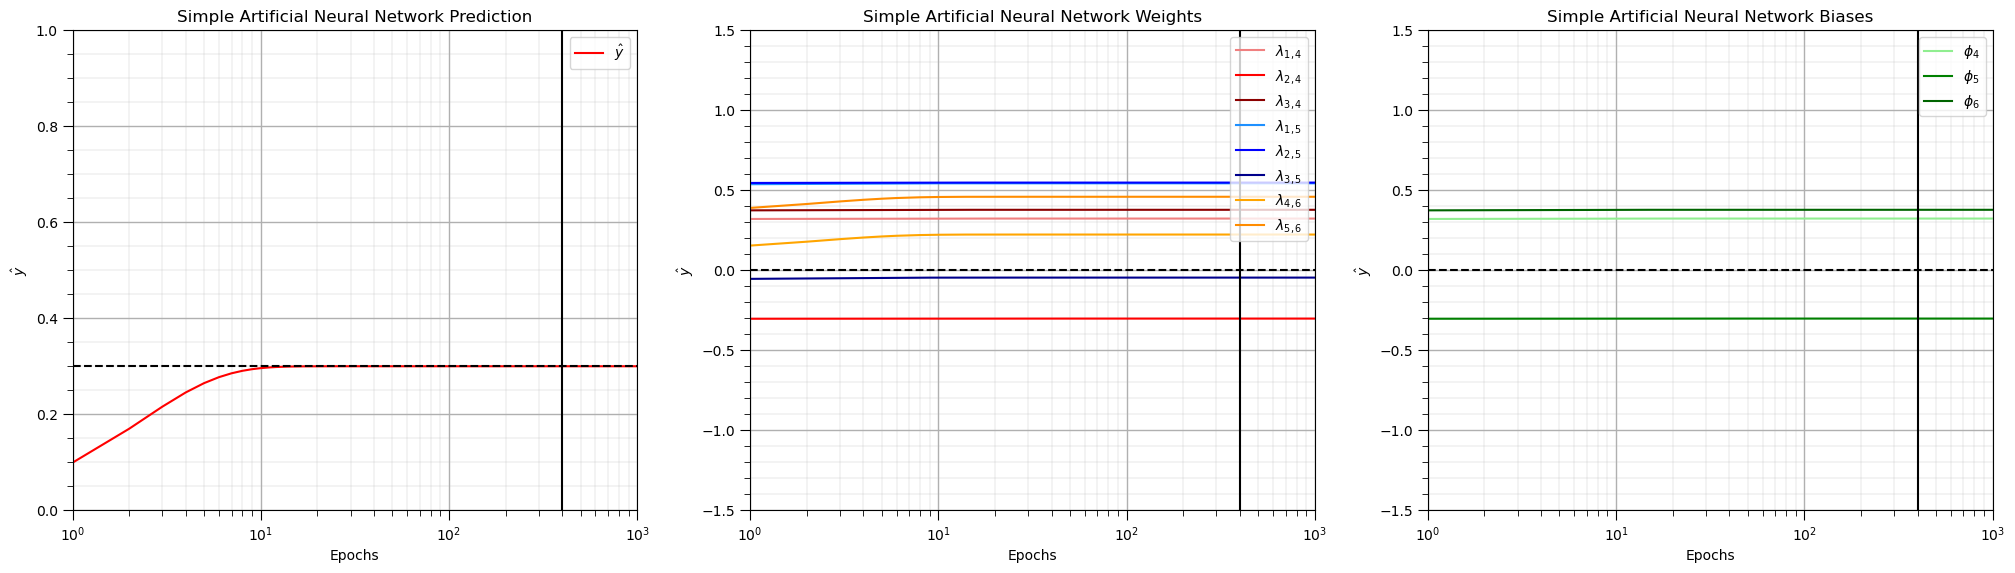

In [5]:
plt.subplot(131)
plt.plot(np.arange(1,nepoch+1,1),y6,color='red',label=r'$\hat{y}$'); plt.xlim([1,nepoch]); plt.ylim([0,1])
plt.xlabel('Epochs'); plt.ylabel(r'$\hat{y}$'); plt.title('Simple Artificial Neural Network Prediction')
plt.plot([1,nepoch],[y,y],color='black',ls='--'); plt.vlines(400,-1.5,1.5,color='black')
add_grid(); plt.legend(loc='upper right'); plt.xscale('log')

plt.subplot(132)
plt.plot(np.arange(1,nepoch+1,1),w14,color='lightcoral',label = r'$\lambda_{1,4}$') 
plt.plot(np.arange(1,nepoch+1,1),w24,color='red',label = r'$\lambda_{2,4}$') 
plt.plot(np.arange(1,nepoch+1,1),w34,color='darkred',label = r'$\lambda_{3,4}$') 
plt.plot(np.arange(1,nepoch+1,1),w15,color='dodgerblue',label = r'$\lambda_{1,5}$') 
plt.plot(np.arange(1,nepoch+1,1),w25,color='blue',label = r'$\lambda_{2,5}$') 
plt.plot(np.arange(1,nepoch+1,1),w35,color='darkblue',label = r'$\lambda_{3,5}$')
plt.plot(np.arange(1,nepoch+1,1),w46,color='orange',label = r'$\lambda_{4,6}$')
plt.plot(np.arange(1,nepoch+1,1),w56,color='darkorange',label = r'$\lambda_{5,6}$')
plt.plot([1,nepoch],[0,0],color='black',ls='--')
plt.xlim([1,nepoch]); plt.ylim([-1.5,1.5]); plt.vlines(400,-1.5,1.5,color='black')
plt.xlabel('Epochs'); plt.ylabel(r'$\hat{y}$'); plt.title('Simple Artificial Neural Network Weights')
add_grid(); plt.legend(loc='upper right'); plt.xscale('log')

plt.subplot(133)
plt.plot(np.arange(1,nepoch+1,1),w14,color='lightgreen',label = r'$\phi_{4}$') 
plt.plot(np.arange(1,nepoch+1,1),w24,color='green',label = r'$\phi_{5}$') 
plt.plot(np.arange(1,nepoch+1,1),w34,color='darkgreen',label = r'$\phi_{6}$') 
plt.plot([1,nepoch],[0,0],color='black',ls='--')
plt.xlim([1,nepoch]); plt.ylim([-1.5,1.5]); plt.vlines(400,-1.5,1.5,color='black')
plt.xlabel('Epochs'); plt.ylabel(r'$\hat{y}$'); plt.title('Simple Artificial Neural Network Biases')
add_grid(); plt.legend(loc='upper right'); plt.xscale('log')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Comments

This was an interactive demonstration of an artifial neural network. Providing students an opportunity to play with machine learning, deep learning for experiential learning.
  
#### The Author:

### Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  
  